In [1]:
import pandas as pd
from matplotlib import pyplot as plt

### Exercice n°1

1. Examinez le [code source C du calcul de produit de matrices](https://moodle.univ-tlse3.fr/pluginfile.php/673629/mod_page/content/2/matmul.c?time=1680076682602)

a. Quels sont les éléments spécifiques à OpenMP ?

> Les éléments spécifiques à OpenMP sont:
> - l'inclusion de la bibliothèque OpenMP (`#include <omp.h>`)
> - les deux appels à la fonction `omp_get_wtime` permettant de récupérer le temps (en secondes) écoulé depuis l'exécution du programme.
> - l'utilisation de la directive `#pragma omp parallel for num_threads(nb) private(j,k)` qui marque le début de la partie parallélisée du code, indique à OpenMP d'éxécuter en parallèle la boucle for qui suit, précise le nombre de threads maximum à utiliser sur toute la partie du code parallélisé et définit comme privées à chaque thread les variables `j` et `k` des deux boucles for suivantes.

b. Comment les performances du programme sont-elles mesurées ?

> La mesure de performance du programme ici est le temps d'éxécution (en secondes). Le programme est éxécuté plusieurs fois avec un nombre différent de threads à chaque fois en partant de 1 thread (donc purement séquentiel). On peut ainsi comparer les temps d'éxécution par nombre de threads.
> 
> Ici, comme le montre le graphe ci-dessous, on constate que plus on utilise de threads, plus le programme est efficace (son temps d'éxécution est réduit), mais plus il est difficile d'être plus efficace:

In [2]:
results = pd.read_csv("./results.csv")

In [3]:
results

,Nb.threads,Tps.
0,1,23.564394
1,2,12.240823
2,3,8.678006
3,4,6.811628
4,5,6.436157
5,6,5.581240
6,7,4.738040
7,8,4.329236


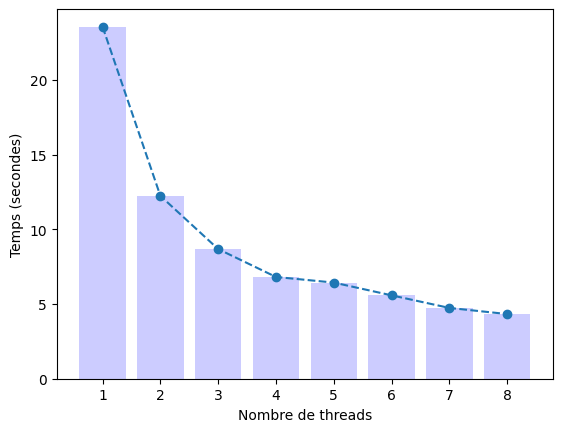

In [4]:
x = results["Nb.threads"]
y = results["Tps."]

plt.bar(x, y, color="#0000ff33")
plt.plot(x, y, '--o')

plt.xlabel("Nombre de threads")
plt.ylabel("Temps (secondes)")

plt.show()